# Visualizing Convolution Neural Nets

Understanding the behavior under the hood of CNN using Keras and matplotlib libraries

In [1]:
import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Convolution2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


## Image

Let's try out with a single image of a cat from Google ImageNet project : http://image-net.org/

Feel free to download a new image and try it out with something else and see what the model sees

Size of the image is:  (160, 141, 4)


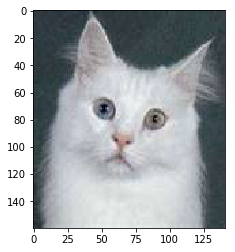

In [2]:
image = plt.imread('Images/cat1.png')
plt.imshow(image)
print "Size of the image is: ", image.shape

Thats a good looking cat. Now lets build a single layer of Convolution NN followed by a MaxPooling layer and visualize what the convolution layer looks like on this image with different kernel sizes

## Visualization Function

Before we visualize, we need to write a small function to help us visualize anything we send at it. It is pretty simple using matplotlib's imshow function

In [3]:
def visualize_layer(data):
    data = np.squeeze(data, axis = 0)
    data = np.where(data < 0, data*-1, data) # imshow() can't deal with negative values so we force values to be +ve
    print data.shape
    plt.imshow(data)
    print "Shape of the image is: ", data.shape

## Single layer CNN

Lets quickly build a single layer neural network with a convolution layer and visualize the output

In [4]:
model = keras.Sequential()
model.add(Conv2D(3, # Number of filters, We use 3 as it makes it easy to visualize. 
                           # In a real life scene this would be much higher like 64 or higher
                 input_shape = image.shape,
                kernel_size=(3,3))) # Size of the kernel

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 139, 3)       111       
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


(158, 139, 3)
Shape of the image is:  (158, 139, 3)


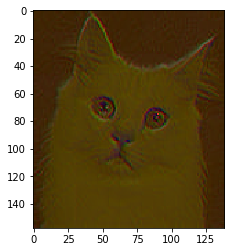

In [5]:
image_batch = np.expand_dims(image, axis=0)
conv_layer_out = model.predict(image_batch)
visualize_layer(conv_layer_out)

What happens when we increase the size of the kernel. We should lose the details that a 3x3 kernel has picked up. Lets try a 20x20 kernel

(141, 122, 3)
Shape of the image is:  (141, 122, 3)


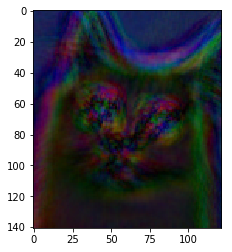

In [6]:
model = keras.Sequential()
model.add(Conv2D(3, # Number of filters, We use 3 as it makes it easy to visualize. 
                           # In a real life scene this would be much higher like 64 or higher
                 input_shape = image.shape,
                kernel_size=(20,20))) # Size of the kernel

conv_layer_out2 = model.predict(image_batch)
visualize_layer(conv_layer_out2)

We lost significant details from the initial layer by increasing hte size of the kernel. In a good neural network, we have both small and large kernels to allow us to capture all details of the image. Also the number of filters are higher to capture the image at a higher dimmension than just 3.

## Max Pooling layer

Let us now use the 3x3 layer and try to visualize what happens when we add a MaxPooling layer on top of the convolution layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 158, 139, 3)       111       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 46, 3)         0         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
None
(52, 46, 3)
Shape of the image is:  (52, 46, 3)


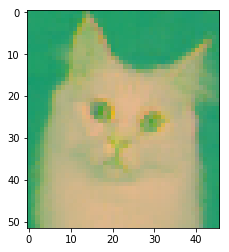

In [7]:
model = keras.Sequential()
model.add(Conv2D(3, # Number of filters, We use 3 as it makes it easy to visualize. 
                           # In a real life scene this would be much higher like 64 or higher
                 input_shape = image.shape,
                kernel_size=(3,3))) # Size of the kernel
model.add(MaxPooling2D(3,3))
print model.summary()


conv_layer_out2 = model.predict(image_batch)
visualize_layer(conv_layer_out2)

As we can see our image size has shrunk, which is an outcome of pooling the data, but we also have some distinct features pop - like the eyes and nose and ears of the cat. Also we generally see that the network would be able to distinguish the general shape of the cat from the background at this layer.

Max Pooling layers allow us to find edges and shapes in the image and thats what it is helping us do here

## Sudo Real life network (with 2 layers)

Uptil now we restricted our first layer filter size to 3 to allow us to be able to easily visualize, lets build a 2 layer network with interlaced max pooling layers to see what the model sees in our cat.

(160, 141, 4)
(19, 16, 3)
Shape of the image is:  (19, 16, 3)


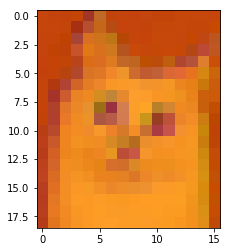

In [8]:
print image.shape
model = keras.Sequential()
model.add(Conv2D(32, # Number of filters
                 input_shape = image.shape,
                 kernel_size=(4,4))) # Size of the kernel
model.add(MaxPooling2D(4,4))
model.add(Conv2D(3, 
                kernel_size=(2,2)))
model.add(MaxPooling2D(2,2))


conv_layer_out2 = model.predict(image_batch)
visualize_layer(conv_layer_out2)

As we see, deeper in the network we will find that the images become more "convoluted" as to say and lose the general shape. The network at this depth is trying to find the minute differences. The more layers we build on top of this, the less recognizable the cat will look. 

## Excercise: Try out with more layers

Try building a custom network and see how the visualization of your neural network looks like.

**NOTE:** Make sure that the last Conv2D layer has a filter size of 3 for us to be able to visualize the image.